# Homework 1
## Social Media Analytics

Clarissa Franklin, Kyle Katzen, Paige McKenzie, Meyappan Subbaiah

In [1]:
import pandas as pd

# Import data

In [2]:
df = pd.read_csv('train.csv')

df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


# Make a dataframe with A-B

In [3]:
paige=pd.DataFrame(df['Choice'])
for i in range(1,12):
    paige[df.columns[i][2:]+'_diff'] = df[df.columns[i]]-df[df.columns[i+11]]
paige.head()

,Choice,follower_count_diff,following_count_diff,listed_count_diff,mentions_received_diff,retweets_received_diff,mentions_sent_diff,retweets_sent_diff,posts_diff,network_feature_1_diff,network_feature_2_diff,network_feature_3_diff
0,0,-34235,-29506,-1686,-14.846518,-3.883525,-8.103828,-0.231920,-6.626665,-64,90.969697,9438.106061
1,0,-17671,331,-1382,49.961485,16.854685,2.481652,0.546816,4.106299,206,-113.587704,-1601.149290
2,0,3688,733,-105,24.768949,9.201969,4.758317,0.490702,2.986516,92,58.594502,5722.563574
3,0,-19542,-17630,-276,-565.184032,-390.016375,-26.220532,-7.067053,-29.271279,-1756,-21.469296,-1299.678967
4,1,38035,-849,2460,127.252413,33.417223,21.117111,2.213765,19.298035,466,78.904293,840.220036


# Make a dataframe with A/B

In [4]:
clarissa=pd.DataFrame(df['Choice'])
for i in range(1,12):
    clarissa[df.columns[i][2:]+'_ratio'] = df[df.columns[i]]/df[df.columns[i+11]].replace(to_replace=0,value=.01)
    
clarissa.head()

,Choice,follower_count_ratio,following_count_ratio,listed_count_ratio,mentions_received_ratio,retweets_received_ratio,mentions_sent_ratio,retweets_sent_ratio,posts_ratio,network_feature_1_ratio,network_feature_2_ratio,network_feature_3_ratio
0,0,0.006616,0.010132,0.001776,0.037846,0.025227,0.012250,0.302336,0.051819,0.030303,2.204413,5.923645
1,0,0.549921,1.390330,0.141615,2.233769,2.884551,1.768866,1.968943,4.836513,2.263804,0.139687,0.453815
2,0,2.018222,2.520747,0.490291,34.713213,26.966469,8.888426,5.882446,5.951102,31.666667,6.670436,21.634244
3,0,0.001022,0.000397,0.007194,0.013425,0.000711,0.048327,0.014022,0.088176,0.003405,0.085218,0.068895
4,1,6.035081,0.503799,14.591160,6.890807,10.330091,4.121682,2.977058,5.229015,6.482353,2.626893,1.421453


# Conduct Peep Jousting to see who wins
### Options: A-B, A/B, or untransformed

In [5]:
from sklearn.model_selection import train_test_split

y = paige['Choice'].values
X = paige[paige.columns[1:]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model1 = LR()
model1.fit(X_train, y_train)

prediction1 = model1.predict(X_test)
print confusion_matrix(y_test, prediction1)
accuracy_score(y_test, prediction1)

[[608 212]
 [198 632]]


0.75151515151515147

In [7]:
y = clarissa['Choice'].values
X = clarissa[clarissa.columns[1:]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model2 = LR()
model2.fit(X_train, y_train)

prediction2 = model2.predict(X_test)
print confusion_matrix(y_test, prediction2)
accuracy_score(y_test, prediction2)

[[ 75 745]
 [  4 826]]


0.54606060606060602

In [9]:
y = df['Choice'].values
X = df[df.columns[1:]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model3 = LR()
model3.fit(X_train, y_train)

prediction3 = model3.predict(X_test)
print confusion_matrix(y_test, prediction3)
accuracy_score(y_test, prediction3)

[[593 227]
 [177 653]]


0.75515151515151513

# Laziness wins!

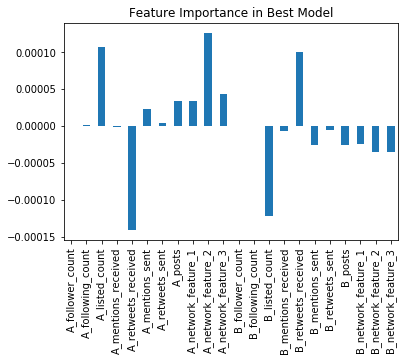

In [11]:
import matplotlib.pyplot as plt

pd.Series(model3.coef_[0], index=df.columns[1:]).plot(kind='bar', title='Feature Importance in Best Model')

plt.show()

In [12]:
print ', '.join(df.columns[[3,4,5,9,12,14,16,20]])

A_listed_count, A_mentions_received, A_retweets_received, A_network_feature_1, B_follower_count, B_listed_count, B_retweets_received, B_network_feature_1


# Re-run model after dropping variables with low importance

In [13]:
y = df['Choice'].values
X = df[df.columns[[3,4,5,9,12,14,16,20]]].values

X_train_smol, X_test_smol, y_train_smol, y_test_smol = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model4 = LR()
model4.fit(X_train_smol, y_train_smol)

prediction4 = model4.predict(X_test_smol)
print confusion_matrix(y_test_smol, prediction4)
accuracy_score(y_test_smol, prediction4)

[[614 206]
 [191 639]]


0.7593939393939394

### Unfortunately, accuracy decreased when less important variables are omitted. For that reason, our final model is model3, the untransformed data with all variables included.

In [15]:
profit_comp = pd.DataFrame([y_test, prediction3, X_test[:,0], X_test[:,11]], index=['true', 'pred', 'A_followers', 'B_followers']).T

profit_comp['correct'] = profit_comp['true']==profit_comp['pred']
profit_comp['Strategy_A'] = (profit_comp['true']*profit_comp['A_followers']*.0005*10)+(abs(profit_comp['true']-1)*profit_comp['B_followers']*.0005*10)-10 #odds purchase * profit if purchase

profit_comp.loc[~profit_comp['correct'], 'Strategy_B'] = -10 #prediction was incorrect

profit_comp.loc[(profit_comp['correct']) & (profit_comp['pred']==1.), 'Strategy_B'] = (profit_comp['A_followers']*.00075*10)-10
profit_comp.loc[(profit_comp['correct']) & (profit_comp['pred']==0.), 'Strategy_B'] = (profit_comp['B_followers']*.00075*10)-10

profit_comp.loc[(profit_comp['true']==1.), 'Strategy_C'] = (profit_comp['A_followers']*.00075*10)-10
profit_comp.loc[(profit_comp['true']==0.), 'Strategy_C'] = (profit_comp['B_followers']*.00075*10)-10

profit_comp.head(5)

,true,pred,A_followers,B_followers,correct,Strategy_A,Strategy_B,Strategy_C
0,0.0,0.0,267.0,102116.0,True,500.580,755.8700,755.8700
1,1.0,1.0,9679.0,209.0,True,38.395,62.5925,62.5925
2,1.0,1.0,404679.0,598.0,True,2013.395,3025.0925,3025.0925
3,0.0,0.0,10270.0,405315.0,True,2016.575,3029.8625,3029.8625
4,1.0,1.0,889300.0,1271.0,True,4436.500,6659.7500,6659.7500


In [16]:
print "Lift of prediction: {}".format(sum(profit_comp['Strategy_B'])/sum(profit_comp['Strategy_A']))

print "Lift of perfect model: {}".format(sum(profit_comp['Strategy_C'])/sum(profit_comp['Strategy_A']))

Lift of prediction: 1.3924329189
Lift of perfect model: 1.50096913591
